# 股票市场分析（多支股票分析）

本程序是分析股票市场数据，特别是科技取票市场，先用pandas做数据分析和可视化，然后使用LSTM进行预测
分析每支股票的变动，多支股票之间的关系，最后进行预测及风险评估

数据说明及描述

# 第一部分  在网站上读入数据 

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns  #设置作图风格
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")#一种绘图风格  适用于股票
%matplotlib inline

# For reading stock data from yahoo  #从雅虎获取数据
from pandas_datareader.data import DataReader #读取数据

# For time stamps
from datetime import datetime #返回当前的日期和时间

Pandas库提供了专门从财经网站获取金融数据的API接口，可作为量化交易股票数据获取的另一种途径，该接口在urllib3库基础上实现了以客户端身份访问网站的股票数据。需要注意的是目前模块已经迁徙到pandas-datareader包中，因此导入模块时需要由import pandas.io.data as web更改为import pandas_datareader.data as web。以data.frame的格式读取

In [8]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']  #设定科技模块包含这4支股票

# Set up End and Start times for data grab
end = datetime.now() #现在时间
start = datetime(end.year - 1, end.month, end.day) #初始和结束时间 #初始时间一年前


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end) #在网站读取对应股票对应时间的股票信息

In [9]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0) #将读取的数据连接成新的数据集
df.tail(10)  #输出尾部的10组数据

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-12-04,3198.209961,3158.760010,3198.209961,3162.580078,2913600.0,3162.580078,AMAZON
2020-12-07,3180.760010,3141.689941,3156.479980,3158.000000,2751300.0,3158.000000,AMAZON
2020-12-08,3184.129883,3120.020020,3158.899902,3177.290039,3286300.0,3177.290039,AMAZON
2020-12-09,3174.429932,3088.000000,3167.889893,3104.199951,4100800.0,3104.199951,AMAZON
2020-12-10,3142.100098,3076.000000,3088.989990,3101.489990,3030200.0,3101.489990,AMAZON
2020-12-11,3118.669922,3072.820068,3096.659912,3116.419922,3064700.0,3116.419922,AMAZON
2020-12-14,3190.469971,3126.000000,3143.000000,3156.969971,4155800.0,3156.969971,AMAZON
2020-12-15,3188.500000,3130.489990,3181.010010,3165.120117,3323700.0,3165.120117,AMAZON
2020-12-16,3247.000000,3163.679932,3176.010010,3240.959961,4427600.0,3240.959961,AMAZON


# 第二部分  数据描述 ——统计描述 数据曲线图  直方图

In [10]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,94.360620,91.702510,93.001427,93.103661,1.565131e+08,92.777538
std,21.356728,20.795591,21.247031,21.062309,7.133955e+07,21.203859
min,57.125000,53.152500,57.020000,56.092499,2.415860e+07,55.744217
25%,75.887499,74.166250,74.991875,75.105001,1.096560e+08,74.506163
50%,88.994999,87.538750,88.088749,88.114998,1.379199e+08,87.804924
75%,116.330002,113.423752,114.965002,115.032501,1.870393e+08,114.834385
max,137.979996,130.529999,137.589996,134.179993,4.268848e+08,133.948898


In [11]:
AAPL.info()  #代表是输出信息

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-12-17 to 2020-12-17
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          254 non-null    float64
 1   Low           254 non-null    float64
 2   Open          254 non-null    float64
 3   Close         254 non-null    float64
 4   Volume        254 non-null    float64
 5   Adj Close     254 non-null    float64
 6   company_name  254 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.9+ KB


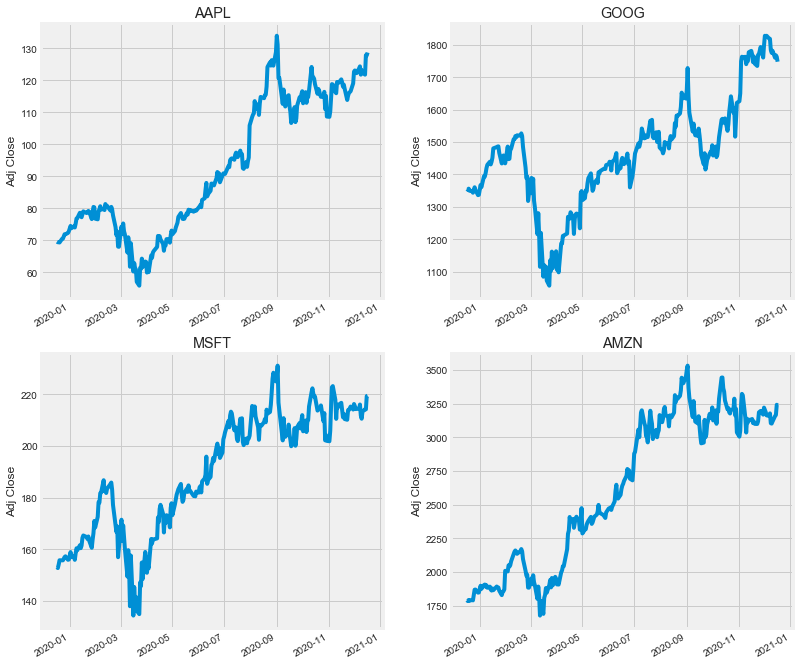

In [12]:
# Let's see a historical view of the closing price交易价格历史数据


plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

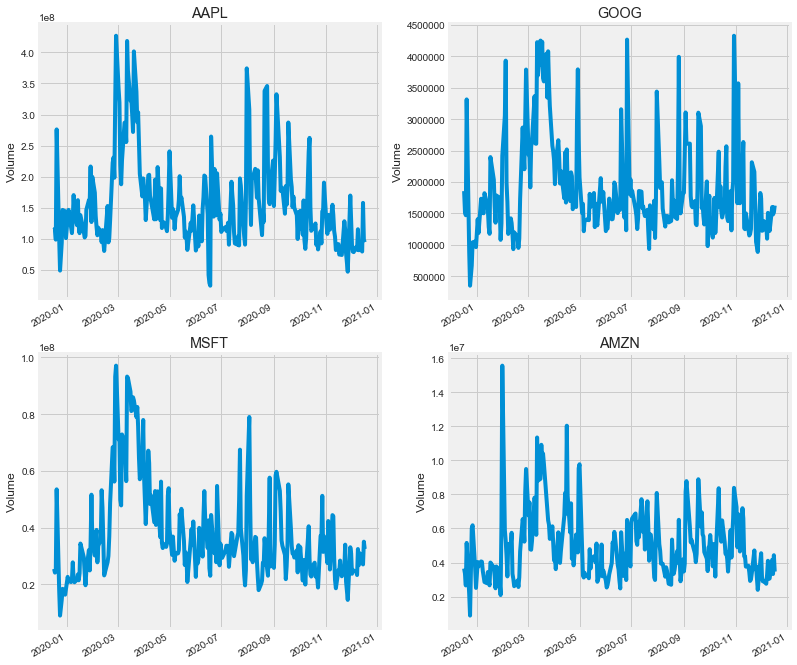

In [13]:
# Now let's plot the total volume of stock being traded each day 交易量历史数据
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

In [14]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [15]:
print(GOOG.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


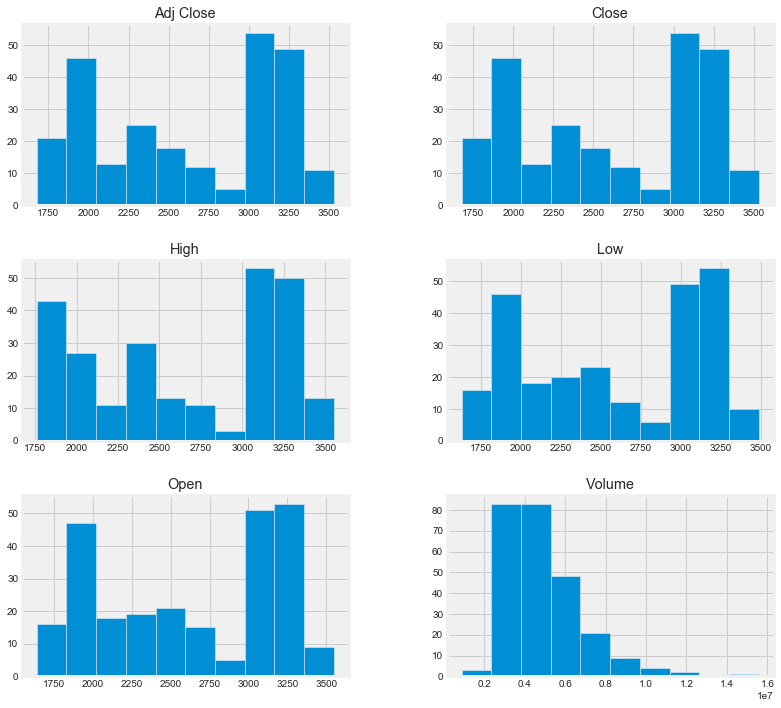

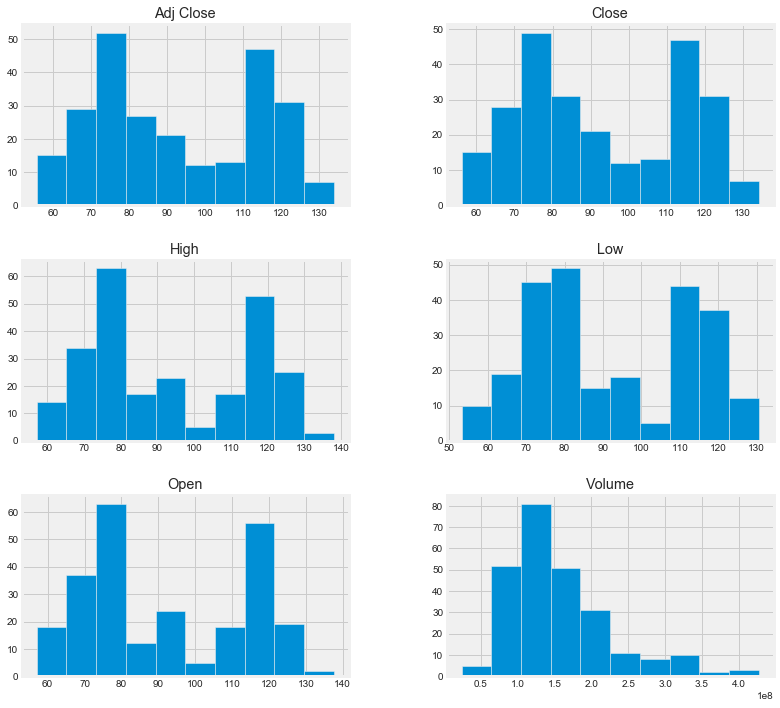

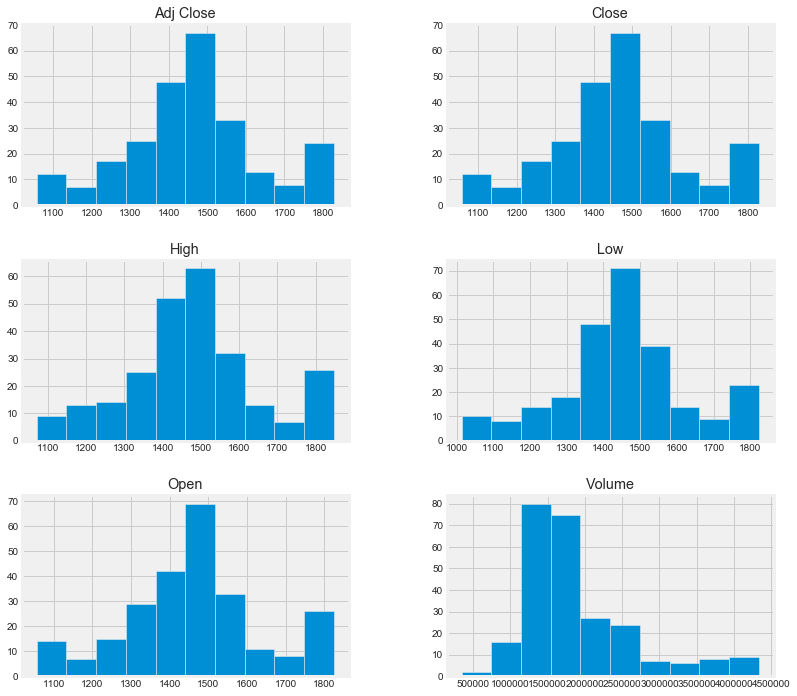

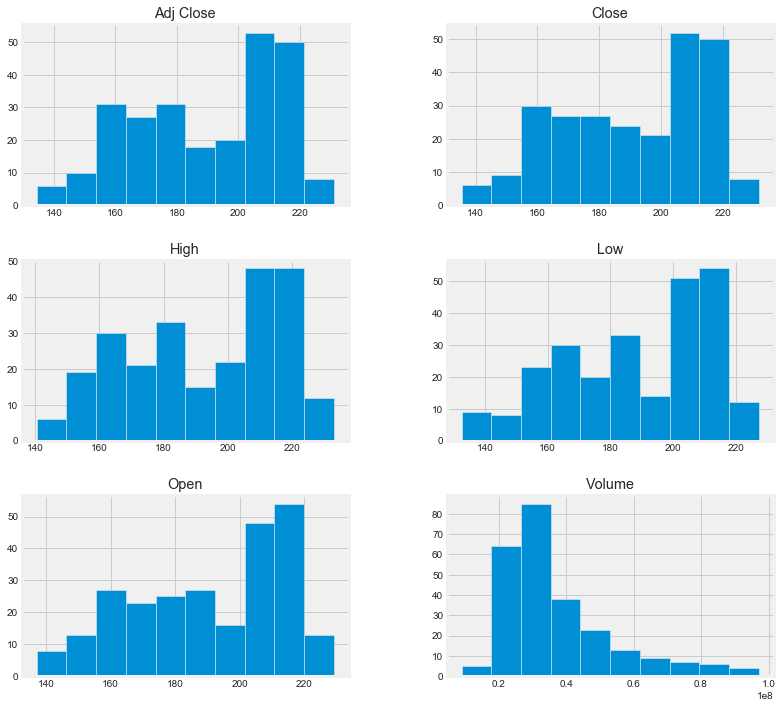

In [16]:
df.groupby("company_name").hist(figsize=(12, 12)); #hist是直方图

# 对各支股票数据进行移动平均MA

移动平均方法MA：移动平均法是用一组最近的实际数据值来预测未来一期或几期内公司产品的需求量、公司产能等的一种常用方法。移动平均法适用于即期预测。
即预测第T+1天的数据，确定MA的步骤，比如10 ，就用前10天的平均值作为预测值

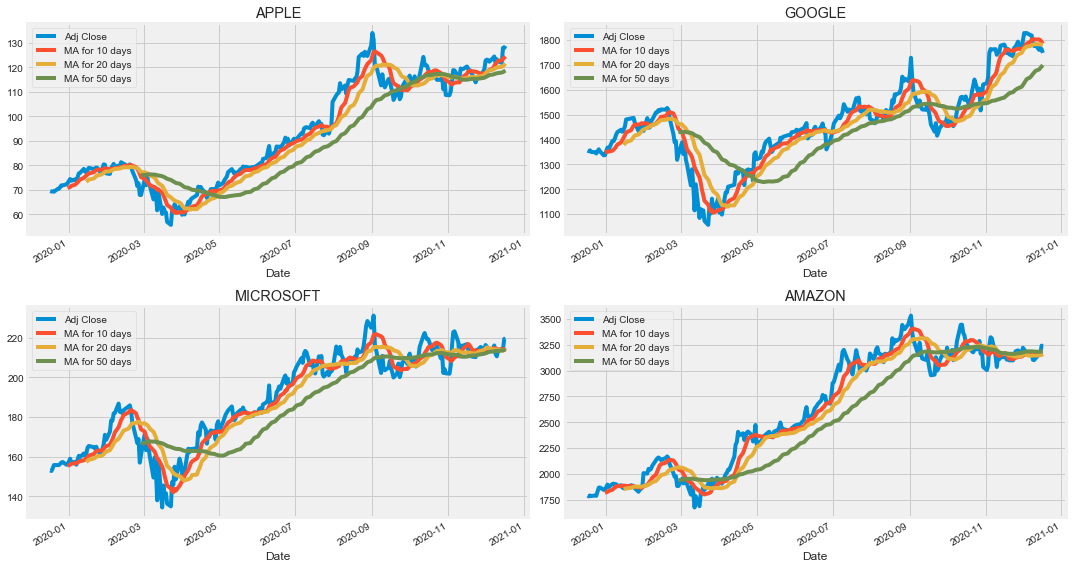

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)
##直接进行的移动平均的操作
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

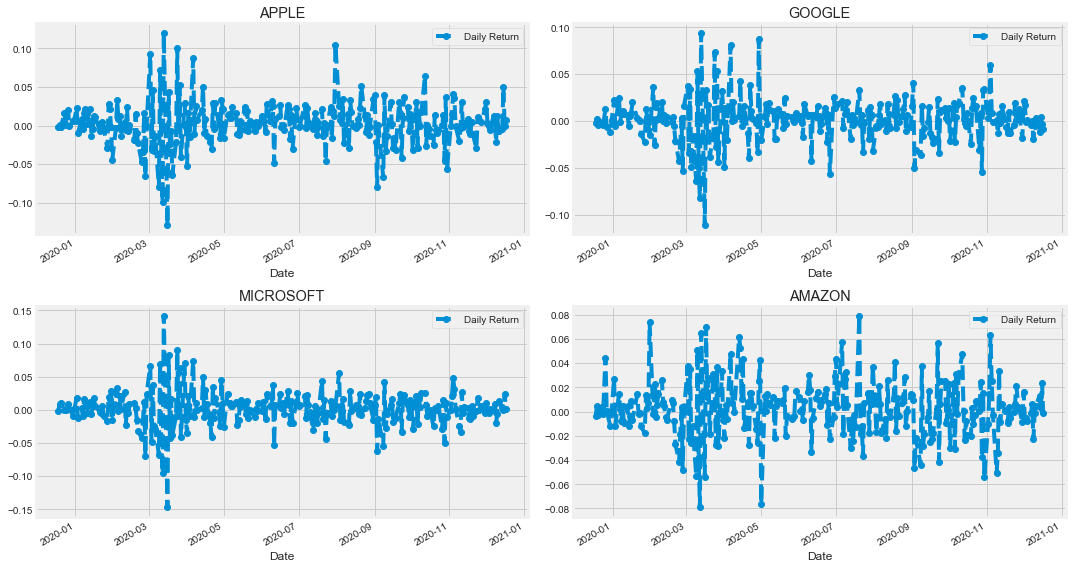

In [18]:
# We'll use pct_change to find the percent change for each day  日收益率
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

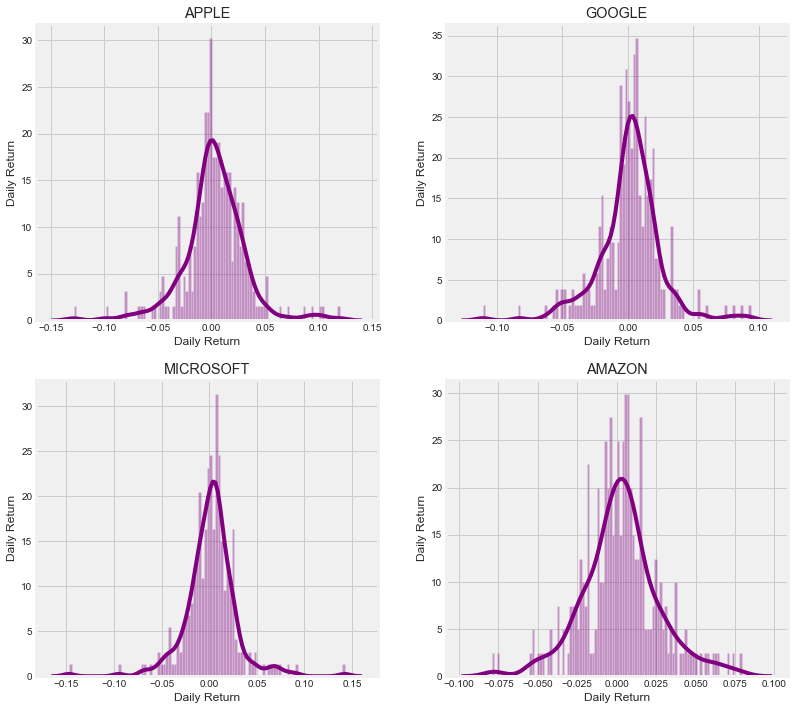

In [19]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn  收益率的直方图
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()

In [20]:
# Grab all the closing prices for the tech stock list into one DataFrame   分析收盘价格
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']  

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-12-17,69.502274,1355.119995,153.068451,1790.660034
2019-12-18,69.336212,1352.619995,152.751816,1784.030029
2019-12-19,69.405609,1356.040039,154.077759,1792.280029
2019-12-20,69.261856,1349.589966,155.759949,1786.500000
2019-12-23,70.392090,1348.839966,155.759949,1793.000000


In [21]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-12-17,NaN,NaN,NaN,NaN
2019-12-18,-0.002389,-0.001845,-0.002069,-0.003703
2019-12-19,0.001001,0.002528,0.008680,0.004624
2019-12-20,-0.002071,-0.004757,0.010918,-0.003225
2019-12-23,0.016318,-0.000556,0.000000,0.003638


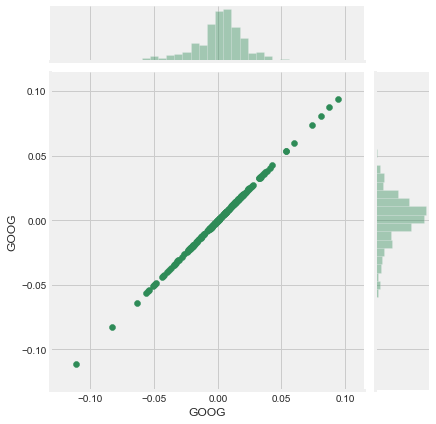

In [22]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

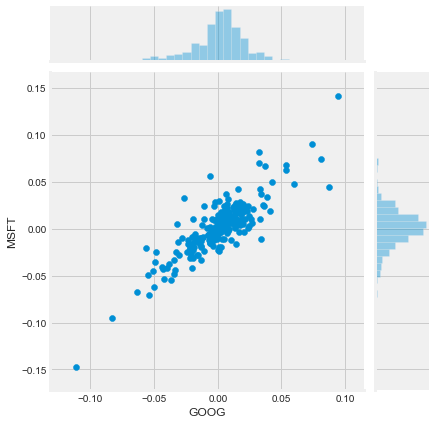

In [23]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

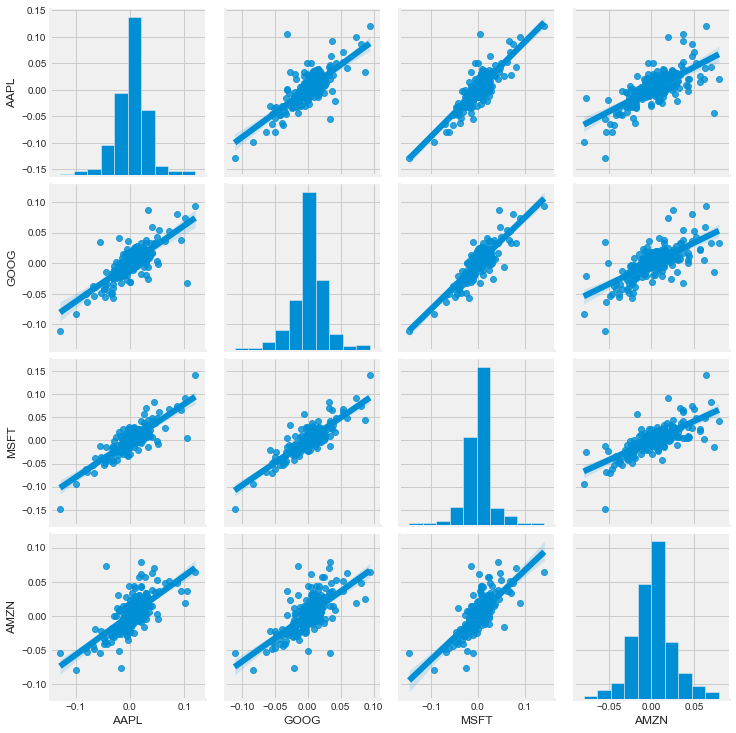

In [24]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

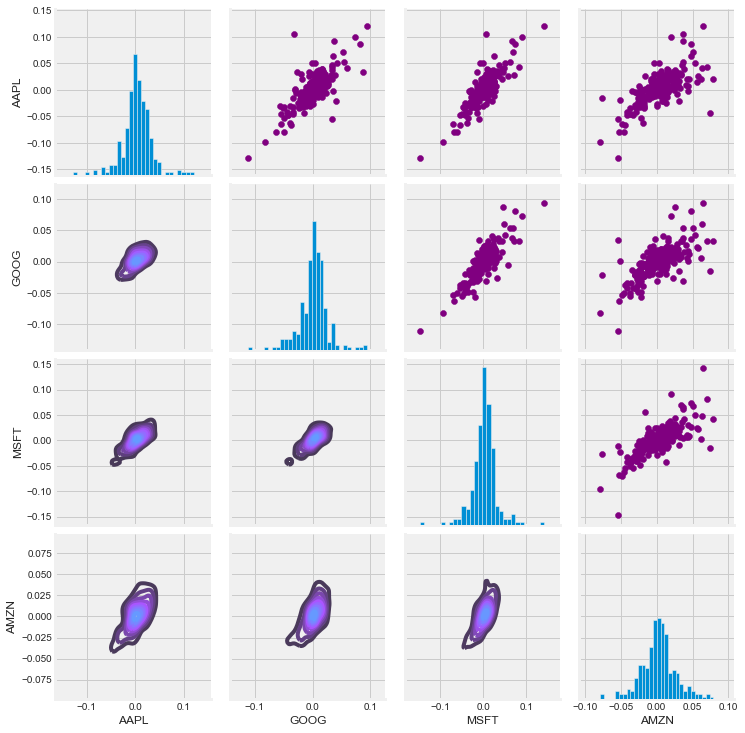

In [25]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

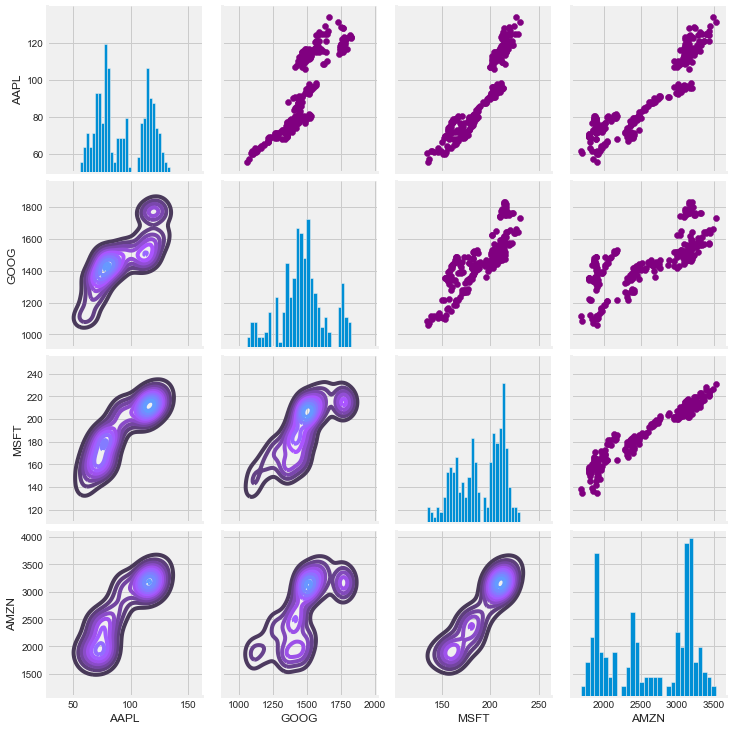

In [26]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

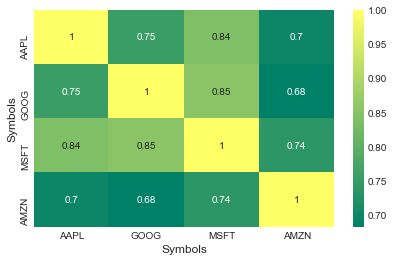

In [27]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns  #分析4支股票之间的相关性
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

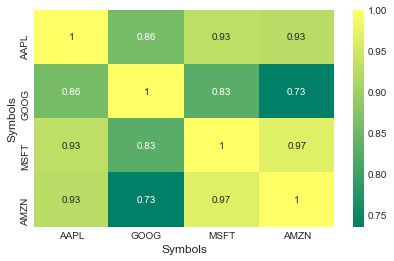

In [28]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

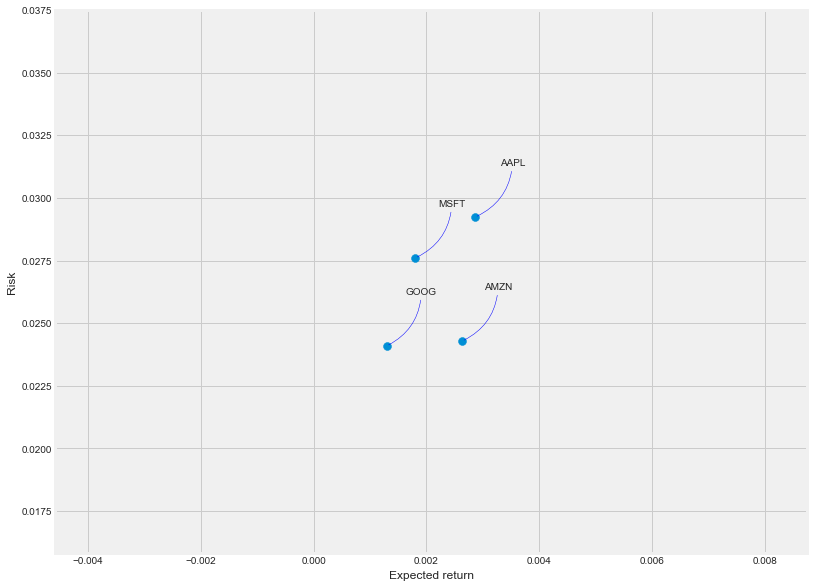

In [29]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
#绘制风险  收益曲线
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 进行预测

In [30]:
#Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())  将近9年的数据2254天
#Show teh data
df

SyntaxError: invalid syntax (<ipython-input-30-49af3978fffb>, line 2)

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close']) #对数据类型进行过滤   这里是在原始数据中提取close数据
#Convert the dataframe to a numpy array
dataset = data.values #格式的转变  将数据框类型的数据转换为数组(数值型)
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 )) #提取80%的数据作为训练集

training_data_len  #训练数据长度1804

In [ ]:
#Scale the data  标准化数据
from sklearn.preprocessing import MinMaxScaler #最大最小标准化

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

# 将样本划分为训练和测试集

In [ ]:
#Create the training data set 
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

# 使用LSTM进行模型搭建和训练

In [ ]:
import tensorflow 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))
###这里LSTM和dense层的搭建为什么都是双层的

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# 训练好的模型进行预测

In [ ]:
#将训练的模型应用于测试数据集
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values   进行预测
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))预测误差
rmse

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])  #将真实值和预测值画到一个图上
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right') #图例
plt.show()

In [ ]:
#Show the valid and predicted prices
valid